In [12]:
import ase, ase.io
import matplotlib.pyplot as plt
import numpy as np

# Further stuff:
This is another way to benchmark potentials. 

In [24]:
def get_rmse(results_path, melt=False):
    #print("get melt?   ", melt)
    test_data_path = results_path + "test_data.xyz"
    train_data_path = results_path + "train_data.xyz"
    if melt==True:
        atoms = ase.io.read(test_data_path, index=':')
        atoms_melt=[]
        for j, val in enumerate(atoms):     
            if val.info['config_type'] == 'Ti_T4200': atoms_melt.append(val)
            if val.info['config_type'] == 'Ti_T3700': atoms_melt.append(val)
            if val.info['config_type'] == 'TiAl_T5000': atoms_melt.append(val)
            if val.info['config_type'] == 'TiAl3_T5000': atoms_melt.append(val)
            if val.info['config_type'] == 'Ti3Al_T5000': atoms_melt.append(val)
            if val.info['config_type'] == 'Al_T3000': atoms_melt.append(val)
            if val.info['config_type'] == 'Al_T4000': atoms_melt.append(val)
        atoms_data_test = atoms_melt
        atoms = ase.io.read(train_data_path, index=':')
        atoms_melt=[]
        for j, val in enumerate(atoms):     
            if val.info['config_type'] == 'Ti_T4200': atoms_melt.append(val)
            if val.info['config_type'] == 'Ti_T3700': atoms_melt.append(val)
            if val.info['config_type'] == 'TiAl_T5000': atoms_melt.append(val)
            if val.info['config_type'] == 'TiAl3_T5000': atoms_melt.append(val)
            if val.info['config_type'] == 'Ti3Al_T5000': atoms_melt.append(val)
            if val.info['config_type'] == 'Al_T3000': atoms_melt.append(val)
            if val.info['config_type'] == 'Al_T4000': atoms_melt.append(val)
        atoms_data_train = atoms_melt
    else:
        atoms_data_test = ase.io.read(test_data_path, index=':')
        atoms_data_train = ase.io.read(train_data_path, index=':')
    atoms_test = []
    atoms_train = []
    atoms = ase.io.read(results_path+ 'TiAl_results_test.xyz', index=':')
    atoms2 = ase.io.read(results_path+ 'TiAl_results_train.xyz', index=':')
    if melt==True:
            #print('getting melt')
        atoms_melt=[]
        for j, val in enumerate(atoms):     
            if val.info['config_type'] == 'Ti_T4200': atoms_melt.append(val)
            if val.info['config_type'] == 'Ti_T3700': atoms_melt.append(val)
            if val.info['config_type'] == 'TiAl_T5000': atoms_melt.append(val)
            if val.info['config_type'] == 'TiAl3_T5000': atoms_melt.append(val)
            if val.info['config_type'] == 'Ti3Al_T5000': atoms_melt.append(val)
            if val.info['config_type'] == 'Al_T3000': atoms_melt.append(val)
            if val.info['config_type'] == 'Al_T4000': atoms_melt.append(val)
        atoms_test.append(atoms_melt)
        atoms_melt=[]
        for j, val in enumerate(atoms2):     
            if val.info['config_type'] == 'Ti_T4200': atoms_melt.append(val)
            if val.info['config_type'] == 'Ti_T3700': atoms_melt.append(val)
            if val.info['config_type'] == 'TiAl_T5000': atoms_melt.append(val)
            if val.info['config_type'] == 'TiAl3_T5000': atoms_melt.append(val)
            if val.info['config_type'] == 'Ti3Al_T5000': atoms_melt.append(val)
            if val.info['config_type'] == 'Al_T3000': atoms_melt.append(val)
            if val.info['config_type'] == 'Al_T4000': atoms_melt.append(val)
        atoms_train.append(atoms_melt)
    else:
            #print('all data')
        atoms_test.append(atoms)        
        atoms_train.append(atoms2)
        
    rmse_test =[]
    rmse_train=[]  
    E_test_data=[]
    E_train_data=[]
    for i in atoms_data_test:
        E_test_data.append(i.info['energy']/len(i))
    for i in atoms_data_train:
        E_train_data.append(i.info['energy']/len(i))    
    for i, test in enumerate(atoms_test):
        E_test_result=[]
        for j in range(len(atoms_test[0])):
            E_test_result.append(test[j].info['energy']/len(test[j]))
        rmse_test.append(np.sqrt(np.mean(np.array(E_test_data)-np.array(E_test_result))**2))
        
    for i, train in enumerate(atoms_train):
        E_train_result=[]
        for j in range(len(atoms_train[0])):
            E_train_result.append(train[j].info['energy']/len(train[j]))
        rmse_train.append(np.sqrt(np.mean(np.array(E_train_data)-np.array(E_train_result))**2)) 
    
    return np.array(rmse_test), np.array(rmse_train)

In [35]:
#get the RMSE of the forces in each configuration.
def get_F_rmse(results_path):
    test_data_path = results_path + "test_data.xyz"
    train_data_path = results_path + "train_data.xyz"
    atoms_data_test = ase.io.read(test_data_path, index=':')
    atoms_data_train = ase.io.read(train_data_path, index=':')
    atoms_test = ase.io.read(results_path+ 'TiAl_results_test.xyz', index=':')
    atoms_train = ase.io.read(results_path+ 'TiAl_results_train.xyz', index=':')
    
    rmse_test=[]
    rmse_train = []
    for i, atoms in enumerate(atoms_test):
        F_test=[]
        F_test_data=[]
        for j in range(len(atoms)):
            F_test.append(np.linalg.norm(atoms.arrays['force'][j])/len(atoms))
            F_test_data.append(np.linalg.norm(atoms_data_test[i].arrays['force'][j])/len(atoms_data_test[i]))
        rmse_test.append(np.sqrt(np.mean(np.array(F_test_data)-np.array(F_test))**2))
    for i, atoms in enumerate(atoms_train):
        F_test=[]
        F_test_data=[]
        for j in range(len(atoms)):
            F_test.append(np.linalg.norm(atoms.arrays['force'][j])/len(atoms))
            F_test_data.append(np.linalg.norm(atoms_data_train[i].arrays['force'][j])/len(atoms_data_train[i]))
        rmse_train.append(np.sqrt(np.mean(np.array(F_test_data)-np.array(F_test))**2)) 
                               
    return rmse_test, rmse_train


In [36]:
#in here we have some predictions from a GAP with a SOAP and Pair pot. (Note gap_fit appears to be a bit buggy
# on avon, but shoud work for a SOAP descripor: see the job_avon.sh in example_dir_avon). this job was ran on
#hetmathsys node.
example_run_dir = 'example_dir_hetsys/'

RMSE_test_data, RMSE_train_data= get_rmse(example_run_dir)
RMSE_test_data_melt, RMSE_train_data_melt = get_rmse(example_run_dir, melt=True)

In [37]:
print('The RMSE of the total energy in test and train structures:',RMSE_test_data, RMSE_train_data, 'eV')
print('The RMSE of the total energy in test and train melted structures:',RMSE_test_data_melt, RMSE_train_data_melt, 'eV')

The RMSE of the total energy in test and train structures: [0.00095456] [0.00018894] eV
The RMSE of the total energy in test and train melted structures: [0.01135058] [8.17646579e-05] eV


In [38]:
RMSE_forces_test, RMSE_forces_train=get_F_rmse(example_run_dir)

Text(0, 0.5, 'RMSE of forces (eV/$\\AA$)')

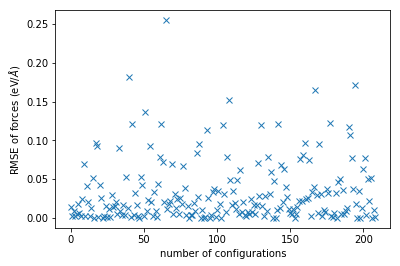

In [44]:
plt.plot(RMSE_forces_train, 'x')
plt.xlabel('number of configurations')
plt.ylabel('RMSE of forces (eV/$\AA$)')

In [59]:
#loading in atoms objects
atoms_test= ase.io.read('example_dir_hetsys/test_data.xyz', index=':')
atoms_test_results = ase.io.read('example_dir_hetsys/TiAl_results_test.xyz', index=':')
E_test = []
E_test_results=[]
#collecting the total energy of each config.
for i, val in enumerate(atoms_test):
    E_test.append(atoms_test[i].get_potential_energy())
    E_test_results.append(atoms_test_results[i].get_potential_energy())

Text(0.5, 0, 'model output (eV)')

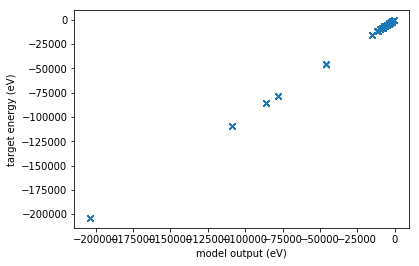

In [61]:
plt.plot(E_test_results, E_test, 'x')
plt.ylabel('target energy (eV)')
plt.xlabel('model output (eV)')

In [67]:
#visualise some configs.
from ase.visualize import view
view(atoms_test, viewer='ngl')